<a href="https://colab.research.google.com/github/MunnaGITAM/Rohit_INFO5731_SPRING2022/blob/main/INFO5731_Assignment_Three_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here

import csv, collections, nltk, pandas as pd, numpy as np, textblob
from gensim.models import Word2Vec

# Run this command to download all data related to nltk : python3 -m nltk.downloader all
nltk.download('brown')
nltk.download('punkt')
########## Variables #############
INPUT_FILE_PATH = '/content/Data.csv'

# Reading the file and storing in an array
def read_lines_from_csv(filepath):
    lines = []
    with open(filepath) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        # Skip the header
        next(csv_reader, None)
        for row in csv_reader:
            lines.append(row[1].lower().replace('.', ' ').replace('-', ' ').replace(',', ' '))
    return lines
    
lines = read_lines_from_csv(INPUT_FILE_PATH)    


def get_ngrams_for_sentences(sentences, n):
    ngrams = []
    for sentence in sentences:
        # find ngrams
        ngram_words = list(nltk.ngrams(sentence.split(), n))
        ngram_words = [' '.join(ngram) for ngram in ngram_words]
        ngrams.extend(ngram_words)
    return ngrams

########## Part-1 : Frequency of Trigrams ##########
# Reference : https://rpubs.com/TuPham/ngrams
trigrams = get_ngrams_for_sentences(lines, 3)
trigrams_frequencies = dict(collections.Counter(trigrams).most_common())
print('Trigram frequencies: ')
print(trigrams_frequencies)

########## Part-2 : N-gram probability ##########
# Reference : https://towardsdatascience.com/understanding-word-n-grams-and-n-gram-probability-in-natural-language-processing-9d9eef0fa058
unigrams = get_ngrams_for_sentences(lines, 1)
bigrams = get_ngrams_for_sentences(lines, 2)

unigram_frequencies = dict(collections.Counter(unigrams).most_common())
bigram_frequencies = dict(collections.Counter(bigrams).most_common())

# Calculating bigrams probability
probabilites = {}
for bigram in bigrams:
    w2, w1 = bigram.split(' ')
    probabilites[bigram] = bigram_frequencies[bigram] / unigram_frequencies[w2]
print('Bigram probabilities: ')
print(probabilites)

########## Part-3 : Noun phrases & its relative probability ##########
lines = lines[:100]
all_noun_phrases = []
review_noun_frequency_map = {}
for line in lines:
    noun_phrases = textblob.TextBlob(line).noun_phrases
    noun_phrases_frequencies = dict(collections.Counter(noun_phrases))
    review_noun_frequency_map[line] = noun_phrases_frequencies
    all_noun_phrases.extend(noun_phrases)
all_noun_phrases_frequencies = dict(collections.Counter(all_noun_phrases))

# All unique noun phrases
unique_noun_phrases = list(set(all_noun_phrases))

relative_probability_table = pd.DataFrame([], columns=unique_noun_phrases, index=lines)

for line in lines:
    noun_phrases_frequencies = review_noun_frequency_map[line]
    for noun_phrase in noun_phrases_frequencies.keys():
        relative_probability = noun_phrases_frequencies[noun_phrase] / all_noun_phrases_frequencies[noun_phrase]
        relative_probability_table.loc[line, noun_phrase] = relative_probability
relative_probability_table = relative_probability_table.fillna(0)
display(relative_probability_table)




[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



raid redemption  \
i am not a big fan of the many  many marvel fil...              0.0   
shaun (simu liu) and katy (awkwafina) are slack...              0.0   
it was an okay movie  simu liu is the son of th...              0.0   
shaun (simu liu) and katy (awkwafina) are parki...              0.0   
i was not expecting that  i had visions of a fi...              0.0   
...                                                             ...   
i had low expectations for this movie  first of...              0.0   
let's keep aside all these serious conversation...              0.0   
destin daniel cretton's 'shang chi and the lege...              0.0   
one of the best origin mcu films  good story  g...              0.0   
i really had fun with this new marvel movie  i ...              0.0   

                                                    super hero film shang chi  \
i am not a big fan of the many  many marvel fil...                        0.0   
shaun (simu liu) and katy (awkwafina) are slack...                        0.0   
it was an okay movie  simu liu is the son of th...                        0.0   
shaun (simu liu) and katy (awkwafina) are parki...                        0.0   
i was not expecting that  i had visions of a fi...                        0.0   
...                                                                       ...   
i had low expectations for this movie  first of...                        0.0   
let's keep aside all these serious conversation...                        0.0   
destin daniel cretton's 'shang chi and the lege...                        0.0   
one of the best origin mcu films  good story  g...                        0.0   
i really had fun with this new marvel movie  i ...                        0.0   

                                                    particular mandarin  \
i am not a big fan of the many  many marvel fil...                  0.0   
shaun (simu liu) and katy (awkwafina) are slack...                  0.0   
it was an okay movie  simu liu is the son of th...                  0.0   
shaun (simu liu) and katy (awkwafina) are parki...                  0.0   
i was not expecting that  i had visions of a fi...                  0.0   
...                                                                 ...   
i had low expectations for this movie  first of...                  0.0   
let's keep aside all these serious conversation...                  0.0   
destin daniel cretton's 'shang chi and the lege...                  0.0   
one of the best origin mcu films  good story  g...                  0.0   
i really had fun with this new marvel movie  i ...                  0.0   

                                                    shang chi 's sister  \
i am not a big fan of the many  many marvel fil...                  0.0   
shaun (simu liu) and katy (awkwafina) are slack...                  0.0   
it was an okay movie  simu liu is the son of th...                  0.0   
shaun (simu liu) and katy (awkwafina) are parki...                  0.0   
i was not expecting that  i had visions of a fi...                  0.0   
...                                                                 ...   
i had low expectations for this movie  first of...                  0.0   
let's keep aside all these serious conversation...                  0.0   
destin daniel cretton's 'shang chi and the lege...                  0.0   
one of the best origin mcu films  good story  g...                  0.0   
i really had fun with this new marvel movie  i ...                  0.0   

                                                    major drawback  \
i am not a big fan of the many  many marvel fil...             0.0   
shaun (simu liu) and katy (awkwafina) are slack...             0.0   
it was an okay movie  simu liu is the son of th...             0.0   
shaun (simu liu) and katy (awkwafina) are parki...             0.0   
i was not expecting that  i had visions of a fi...             0.0   
... 

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [2]:
# Write your code here


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

########## Part-1 : document term matrix ##########
# Read data from files
lines = read_lines_from_csv(INPUT_FILE_PATH)    

# Find document - terms weights using TfidfVectorizer of sklearn for dataset.
count_vect = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
count_matrix = count_vect.fit_transform(lines).toarray()
documents_terms_weights = pd.DataFrame(index=lines, data=count_matrix, columns=count_vect.get_feature_names_out())
display(documents_terms_weights)

########## Part-2 : document term matrix ##########
# Reference : https://studymachinelearning.com/cosine-similarity-text-similarity-metric/
queries = ['best movie i have ever seen']

# Find document - terms weights using TfidfVectorizer of sklearn for query.
query_count_vect = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
query_count_matrix = query_count_vect.fit_transform(queries).toarray()
query_tokens = query_count_vect.get_feature_names_out()
query_documents_terms_weights = pd.DataFrame(index=queries, data=query_count_matrix, columns=query_tokens)

similarity_matrix = cosine_similarity(documents_terms_weights.loc[:, query_tokens], query_count_matrix)
similarity_matrix_df = pd.DataFrame(index=lines, columns=['cosine similarity'], data=similarity_matrix)
similarity_matrix_df = similarity_matrix_df.sort_values(by='cosine similarity', ascending=False)
display(similarity_matrix_df)






,000,007,01,05,10,100,1000,100shang,100this,100what,...,zelda,zero,zest,zhang,zheng,zingers,zombie,zone,zoomy,áll
i am not a big fan of the many many marvel films the only reason i saw this one was that my oldest daughter insisted i watch it and overall i was impressed by the movie though i think it was enjoyable more for the insane eye candy than the story itself i could talk about the plot but just noticed that there are over 2000 reviews for this film so i'll just say that it looked great and would have been great to have seen it on the big screen the story itself though enjoyable wasn't one that particularly grabbed me or impacted on me possibly because it was so violent and frenetic that the film as a consequence lacked intimacy and humanity,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
shaun (simu liu) and katy (awkwafina) are slackers in san francisco well they're chinese slackers which means that they still have jobs they're just dead end jobs unbeknownst to katy shaun's real name is shang chi and he was trained from childhood to fight by his father xu wenwu (tony chiu wai leung) who has been conquering for a thousand years with the ten rings until he met the love of his life shang chi's mother this is mcu doing an asian hero and it's actually pretty funny awkwafina does her comedic thing simu liu does a good every man performance but he's also a good straight man to awkwafina i like the pairing although they may be better as friends then the movie surprises with a comedic turn from ben kingsley i love that part which gave the movie a comedic jolt i wouldn't mind him popping up in other mcu stuff the dragon fight is a little blah but those climatic battles are getting standardized anyways this is a fine addition to the mcu and these are fun characters to add to the gang,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
it was an okay movie simu liu is the son of the seemingly immortal master of the ten rings always good to see tony leung and i hope he soaked disney who winds up opposing his dad and awkwafina is his slacker sort of girlfriend they are fine in the leads as is meng'er zhang as his sister and michelle yeoh as their aunt always good to see her and i hope she soaked disney too i have grown increasingly fond of martial arts films over the last couple of decades and the decline of the movie musical is the reason why they don't make movies like that any more and when they try they're often embarrassing people don't like the unreality of people bursting out into song or expressing their emotions through dance no they prefer the solid commonplace of people floating through space to kick each other in the head to me the fight choreography is its own dance and the fight between leung and fala chen when they meet and before they fall in love is a challenge dance as graceful as any between astaire and rogers there are problems aplenty with this film there's an immense amount of exposition starting off with twenty minutes of it in chinese i'm not sure why ben kingsley as the fake 'mandarin' from iron man 3 is present except for a certain remnant of star power and connecting this to the rest of the mcu still with my expectations not set particularly high i had a good time,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.060177,0.0,0.0,0.0,0.0,0.0,0.0
"shaun (simu liu) and katy (awkwafina) are parking valets underachievers in san francisco katy refers to herself as ""the asian jeff gordon "" after a fight on a bus where shaun reveals himself as a martial arts fighter the two of them travel to china so he can reunite with his sister (meng'er zhang) after six years he was raised to be an assassin and to make a long story short the opening sequence comes into play as they have to save the world marvel has done it again with graphics special effects characters and the right blend of humor i fell in love with katy who wa

,cosine similarity
"didn't have high hope before going in because neither simu nor awkwafina was a superhero movie casting material and mandarin is a very controversial villain of choice but i was pleasantly surprised on how good shang chi was the chemistry between simu and awkwafina was exceptional and tony leung's casting of not mandarin aka xu wenwu was not just amazing but one of the best villains marvel has ever seen it's a villain whose motivation is actually both believable and relatable oh and the actual ""mandarin"" was also a comical gold plus fighting scenes were absolutely amazing first half's martial art scenes were on par with some martial arts classics and later half of well typical marvel cgi stuff were quite of eye candies sure there were few less developed character arcs like shang chi's sister but overall this is an excellent movie that won't disappoint you",0.981960
another marvel comics movie this one takes one of their lesser known characters martial artist shang chi and gives him a film of his own this is not a jumping on point to marvel movies as pre knowledge of some other ones will help shang chi lives in america he has a past he thought he left behind he enjoys karaoke with his best friend (awkwafina) and he just lives he has martial arts movie posters on his bedroom wall but then his past catches up with him and he is forced to fight head across the world discover his past and his destiny like the black panther film this does a good job of showing this world outside of america it's very stylish in representing it's culture and has some great art direction it does manage to get a lot of exposition in without being overwhelmed by it which is not something all comic book movies that have to do that manage awkwafina is quite entertaining playing a character who could easily be very annoying the first action set piece is terrific original gripping and really well done and all in all it does succeed by being a little bit different to what has come before there is an entertaining surprise as well which succeeds in doing some good continuity minor quibbles: it's ten minutes too long my attention did wander during some of the quieter moments and scenes of people talking one flashback is a bit extraneous the character of his sister ends up being rather underused and outside of the first set piece i mentioned they forgot to put any other bits of jeopardy in here of the other two set pieces the first doesn't carry any because you don't believe people are going to get hurt and the final big battle set piece is yet another of these we've seen them all many times now and even though this has some different elements it's still too same old same old but all in all an entertaining watch and those who like their martial arts movies or who like to pretend to do such things when watching fight scenes will be entertained do as ever keep watching to the very end of the closing credits for a couple of extra scenes,0.981960
"overall i really liked the film but i don't think it's what the reviews are making it to be definitely one of the most over praised ever in my opinion let's start with the things i liked and this is definitely the beginning the first act mandarin's brutal battle with the armies hints at the epic and great effects that await us and the power of the rings also the director manages to introduce us to the main characters shang chi and katie and the great chemistry between them with very few and correctly shot scenes the two radiate a very pleasant warmth and you really feel their friendship we also witness two of the best made battle scenes i've seen in a movie the one on the bus and on the scaffolding around the skyscraper maybe that's where the problem is rooted and the film gets a little underwhelming over time because these scenes were so good that nothing could reach them afterwards especially the cg fest which turned out to be the finale another plus i can point out as a consequence of the above is th

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


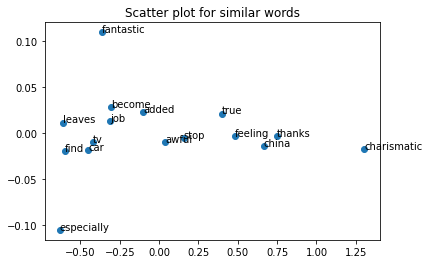

In [3]:
# Write your code here

# Refernce https://www.youtube.com/watch?v=_Rt4LjasO34

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from nltk.corpus import stopwords
nltk.download('stopwords')
from gensim.models import Word2Vec


########## Part-1 : Training word2vec word embedding model ##########
# Read data from files
lines = read_lines_from_csv(INPUT_FILE_PATH)    
tokenised_lines = []
stop_words = set(stopwords.words('english'))
for line in lines:
    tokens = line.split()
    tokens = [token for token in tokens if not token.lower() in stop_words]
    tokenised_lines.append(tokens)
lines = tokenised_lines
model = Word2Vec(sentences = lines, size = 300, window = 3)


########## Part-2 : Visualising word embedding model ##########
# Reference: https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5

topn = 4
batch_size = 4
unique_words = list(model.wv.index2entity)
sampled_words = random.choices(unique_words, k=batch_size)

all_words = []
two_dimensional_data = []
for sample_word in sampled_words:
    similar_words = model.wv.most_similar(sample_word, topn=topn)
    similar_words = [word[0] for word in similar_words]
    word_vectors = np.array([model.wv[word] for word in similar_words])

    all_words.extend(similar_words)
    two_dimensional_data.extend(PCA(random_state=0).fit_transform(word_vectors)[:,:2])

x = [point[0] for point in two_dimensional_data]
y = [point[1] for point in two_dimensional_data]

plt.scatter(x, y)
plt.title('Scatter plot for similar words')

for i in range(len(all_words)):
    plt.annotate(all_words[i], (x[i], y[i]))
plt.show()









# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [5]:
# The GitHub link of your final csv file



# Link: https://github.com/MunnaGITAM/Rohit_INFO5731_SPRING2022/blob/main/Sentiment_Data_Generated.csv






